In [1]:
# IMPORT LIBRARIES
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# LOAD ALL DATA FILE SAVED

# Dataset
path_df = "data.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
# CHECK DIMENSION FEATURE VECTORS
print(features_train.shape)
print(features_test.shape)

(844, 300)
(211, 300)


In [4]:
# SEE WHAT HYPERPARAMETERS THE MODEL HAS:
svc_0 =svm.SVC(kernel='linear')

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [6]:
# MODEL FIT & PERFORMANCE TO TRAINING DATA
svc_0.fit(features_train, labels_train)

# PREDICTIONS
svc_pred = svc_0.predict(features_test)

In [8]:
# TRAINING ACCURACY

print("The training accuracy is: ")
print(accuracy_score(labels_train, svc_0.predict(features_train)))

The training accuracy is: 
0.8530805687203792


In [9]:
# TEST ACCURACY

print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))

The test accuracy is: 
0.6303317535545023


In [10]:
# CLASSIFICATION REPORT

print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.59      0.83      0.69        12
           2       0.67      0.50      0.57        20
           3       0.50      0.72      0.59        18
           4       0.88      0.54      0.67        13
           5       1.00      0.75      0.86         8
           6       1.00      0.20      0.33         5
           7       0.28      0.59      0.38        17
           8       0.33      0.17      0.22         6
           9       0.75      0.69      0.72        13
          10       0.78      0.81      0.79        26
          11       0.54      0.54      0.54        26
          12       0.78      0.54      0.64        13
          13       0.00      0.00      0.00         2
          14       1.00      0.70      0.82        10
          15       1.00      0.50      0.67         2
          16       0.80      0.80      0.80         5
     

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


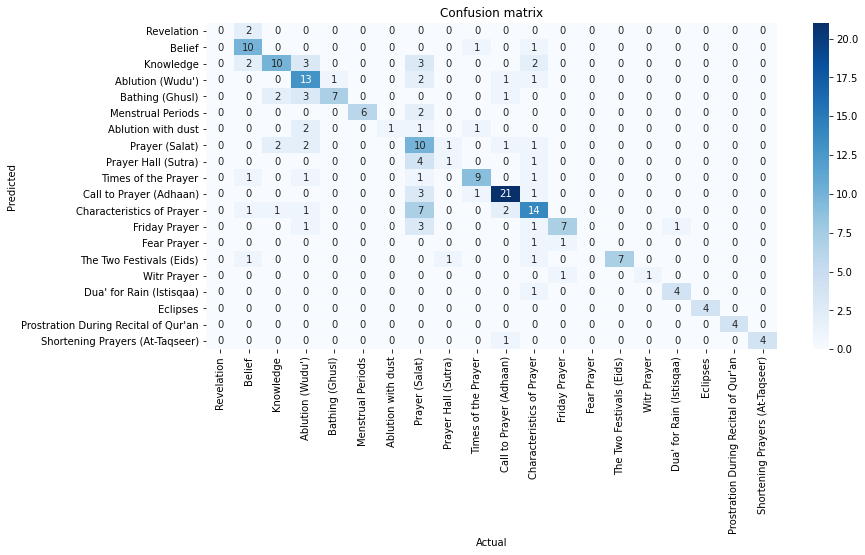

In [11]:
# CONFUSION MATRIX

aux_df = df[['Chapter', 'Label']].drop_duplicates().sort_values('Label')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Chapter'].values, 
            yticklabels=aux_df['Chapter'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [12]:
# Create a dataset with a model summary to compare models (train&test):

d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, svc_0.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.853081,0.630332


In [15]:
# SAVE MODEL & DATASET

with open('svc_0.pickle', 'wb') as output:
    pickle.dump(svc_0, output)
    
with open('df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)